# ===============================================================
#  Project: Banking Insights Dashboard
#  Step 3: Exploratory Data Analysis (EDA)
#  Author: [Your Name]
#  Description:
#    This notebook performs exploratory analysis on the cleaned
#    and merged dataset to identify key insights, trends, and
#    visual patterns before dashboard creation in Tableau.
# ===============================================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display and style
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set(style="whitegrid", palette="deep")

# Inline charts
%matplotlib inline

In [2]:
# Load cleaned datasets from Step 2
merged = pd.read_csv('../data/merged_dataset.csv')
branch_kpi = pd.read_csv('../data/branch_kpi.csv')

print("✅ Cleaned data loaded successfully!")
print("Shape of merged dataset:", merged.shape)
merged.head()


✅ Cleaned data loaded successfully!
Shape of merged dataset: (43227, 22)


,account_id,customer_id,branch_id,opening_balance,account_open_date,account_type,account_status,account_age,first_name,last_name,city,phone_number,occupation,dob,customer_age,branch_name,branch_state,loan_amount,total_transactions,total_transaction_amount,last_transaction_date,churn_flag
0,A00001,C00001,B00019,520482,2014-03-01,Savings,Pending,11,Timothy,Nelson,Davidville,1592081539,Magician,1915-09-03,110,NM00018,New Mexico,7799194.0,14,795292,2022-10-14,1
1,A00001,C00001,B00019,520482,2014-03-01,Savings,Pending,11,Timothy,Nelson,Davidville,1592081539,Magician,1915-09-03,110,NM00018,New Mexico,4814936.0,14,795292,2022-10-14,1
2,A00001,C00001,B00019,520482,2014-03-01,Savings,Pending,11,Timothy,Nelson,Davidville,1592081539,Magician,1915-09-03,110,PR00018,Puerto Rico,7799194.0,14,795292,2022-10-14,1
3,A00001,C00001,B00019,520482,2014-03-01,Savings,Pending,11,Timothy,Nelson,Davidville,1592081539,Magician,1915-09-03,110,PR00018,Puerto Rico,4814936.0,14,795292,2022-10-14,1
4,A00001,C00001,B00019,520482,2014-03-01,Savings,Pending,11,Timothy,Nelson,Davidville,1592081539,Magician,1915-09-03,110,WY00018,Wyoming,7799194.0,14,795292,2022-10-14,1


In [3]:
# Quick dataset summary
print("\n--- Basic Info ---")
merged.info()

print("\n--- Statistical Summary ---")
display(merged.describe())

# Check for missing values
print("\n--- Missing Values ---")
print(merged.isnull().sum().sort_values(ascending=False).head(10))



--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43227 entries, 0 to 43226
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_id                43227 non-null  object 
 1   customer_id               43227 non-null  object 
 2   branch_id                 43227 non-null  object 
 3   opening_balance           43227 non-null  int64  
 4   account_open_date         43227 non-null  object 
 5   account_type              43227 non-null  object 
 6   account_status            43227 non-null  object 
 7   account_age               43227 non-null  int64  
 8   first_name                43227 non-null  object 
 9   last_name                 43227 non-null  object 
 10  city                      43227 non-null  object 
 11  phone_number              43227 non-null  int64  
 12  occupation                43227 non-null  object 
 13  dob                       43227 non-null 

,opening_balance,account_age,phone_number,customer_age,loan_amount,total_transactions,total_transaction_amount,churn_flag
count,43227.000000,43227.000000,4.322700e+04,43227.000000,4.322700e+04,43227.000000,4.322700e+04,43227.0
mean,497376.942467,6.606357,5.015541e+09,65.901474,4.749896e+06,15.104934,7.558571e+05,1.0
std,283768.072173,2.860390,2.904050e+09,27.194701,3.002168e+06,3.867436,2.288146e+05,0.0
min,213.000000,2.000000,1.472273e+06,20.000000,0.000000e+00,3.000000,7.020200e+04,1.0
25%,257401.000000,4.000000,2.455073e+09,42.000000,2.276617e+06,12.000000,5.904510e+05,1.0
50%,499623.000000,7.000000,5.058988e+09,66.000000,4.718757e+06,15.000000,7.396480e+05,1.0
75%,735121.000000,9.000000,7.612611e+09,90.000000,7.348617e+06,18.000000,8.864350e+05,1.0
max,999719.000000,12.000000,9.994012e+09,113.000000,9.994199e+06,28.000000,1.649427e+06,1.0



--- Missing Values ---
account_id           0
customer_id          0
branch_id            0
opening_balance      0
account_open_date    0
account_type         0
account_status       0
account_age          0
first_name           0
last_name            0
dtype: int64


In [4]:
total_customers = merged['customer_id'].nunique()
total_accounts = merged['account_id'].nunique()
total_branches = merged['branch_id'].nunique()
avg_balance = merged['opening_balance'].mean()
avg_loan = merged['loan_amount'].mean()
churn_rate = merged['churn_flag'].mean() * 100

print(f"Total Customers: {total_customers}")
print(f"Total Accounts: {total_accounts}")
print(f"Total Branches: {total_branches}")
print(f"Average Balance: ₹{avg_balance:,.2f}")
print(f"Average Loan: ₹{avg_loan:,.2f}")
print(f"Customer Churn Rate: {churn_rate:.2f}%")


Total Customers: 1000
Total Accounts: 1000
Total Branches: 50
Average Balance: ₹497,376.94
Average Loan: ₹4,749,896.27
Customer Churn Rate: 100.00%


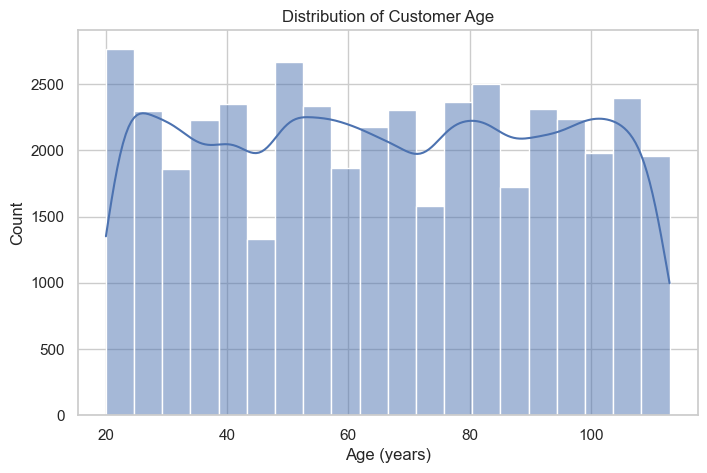

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(merged['customer_age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


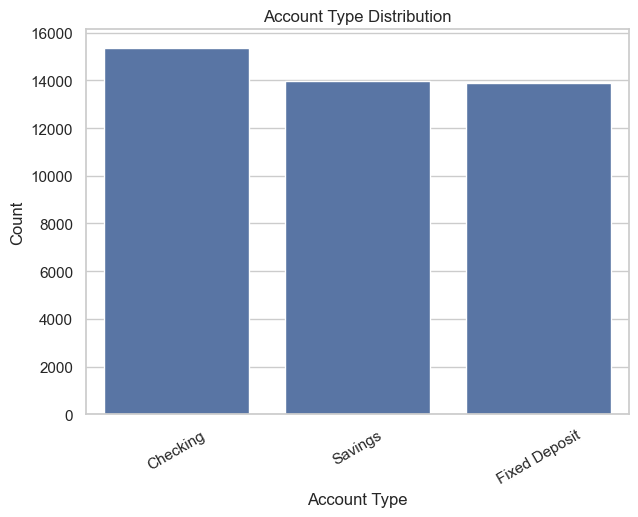

In [6]:
plt.figure(figsize=(7,5))
sns.countplot(data=merged, x='account_type', order=merged['account_type'].value_counts().index)
plt.title('Account Type Distribution')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


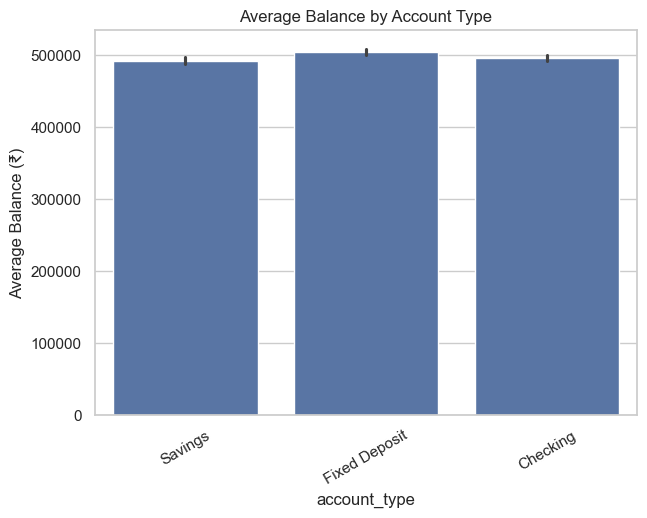

In [7]:
plt.figure(figsize=(7,5))
sns.barplot(data=merged, x='account_type', y='opening_balance', estimator=np.mean)
plt.title('Average Balance by Account Type')
plt.ylabel('Average Balance (₹)')
plt.xticks(rotation=30)
plt.show()


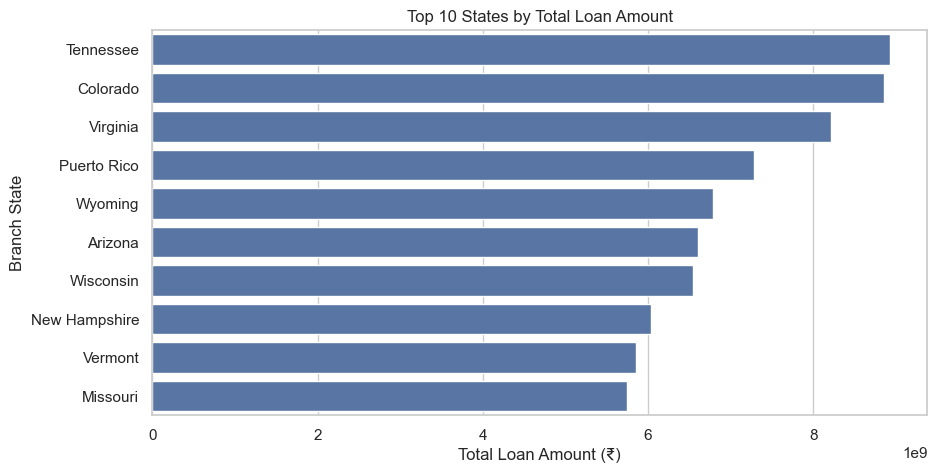

In [8]:
loan_by_branch = merged.groupby('branch_state')['loan_amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=loan_by_branch, x='loan_amount', y='branch_state')
plt.title('Top 10 States by Total Loan Amount')
plt.xlabel('Total Loan Amount (₹)')
plt.ylabel('Branch State')
plt.show()


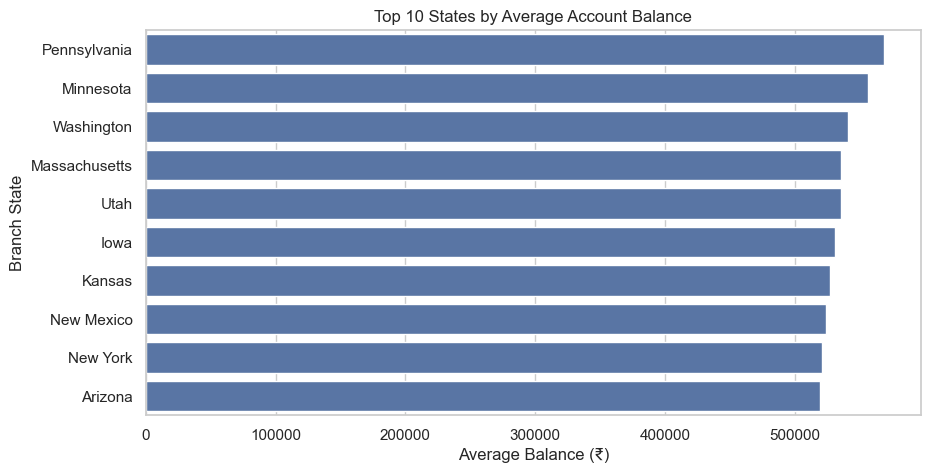

In [9]:
balance_by_branch = merged.groupby('branch_state')['opening_balance'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=balance_by_branch, x='opening_balance', y='branch_state')
plt.title('Top 10 States by Average Account Balance')
plt.xlabel('Average Balance (₹)')
plt.ylabel('Branch State')
plt.show()


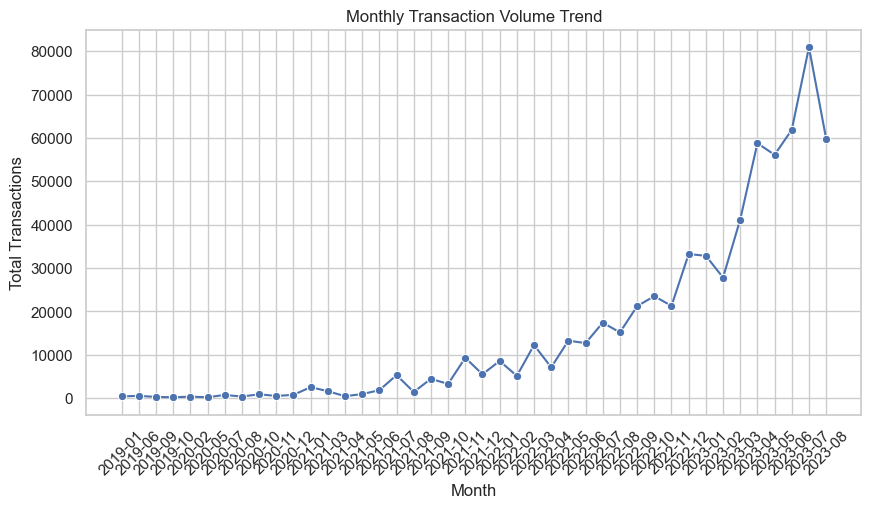

In [12]:
# Convert transaction date and plot monthly activity
merged['last_transaction_date'] = pd.to_datetime(merged['last_transaction_date'], errors='coerce')
merged['txn_month'] = merged['last_transaction_date'].dt.to_period('M')

txn_trend = merged.groupby('txn_month')['total_transactions'].sum().reset_index()
txn_trend['txn_month'] = txn_trend['txn_month'].astype(str)  # Convert period to string

plt.figure(figsize=(10,5))
sns.lineplot(data=txn_trend, x='txn_month', y='total_transactions', marker='o')
plt.title('Monthly Transaction Volume Trend')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.show()

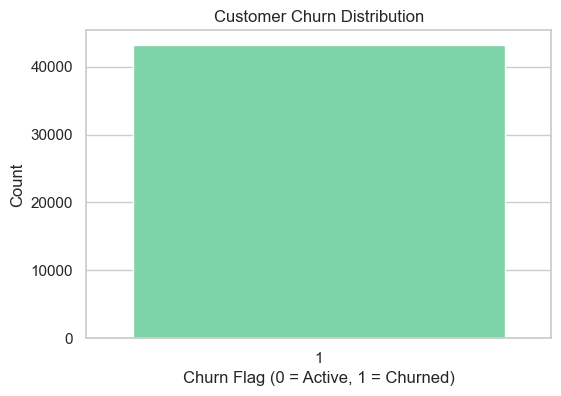

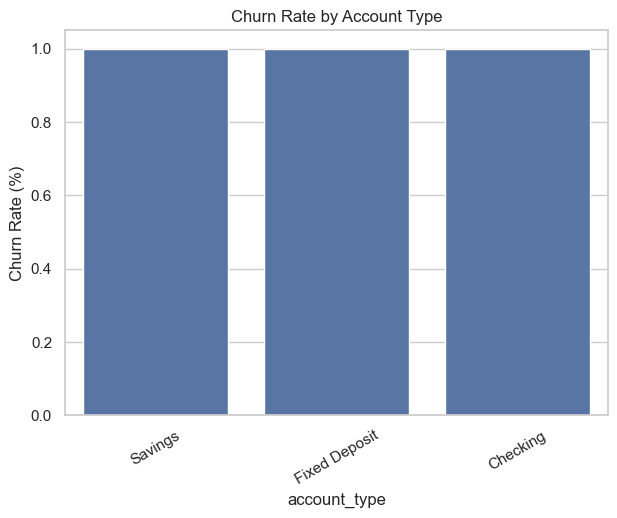

In [16]:
# Create custom colors for each churn value
colors = {0: '#7cd3a5', 1: '#ef5a5a'}
plt.figure(figsize=(6,4))
ax = sns.countplot(data=merged, x='churn_flag')
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Flag (0 = Active, 1 = Churned)')
plt.ylabel('Count')
plt.show()

# Churn rate by account type
plt.figure(figsize=(7,5))
sns.barplot(data=merged, x='account_type', y='churn_flag', estimator=np.mean)
plt.title('Churn Rate by Account Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=30)
plt.show()

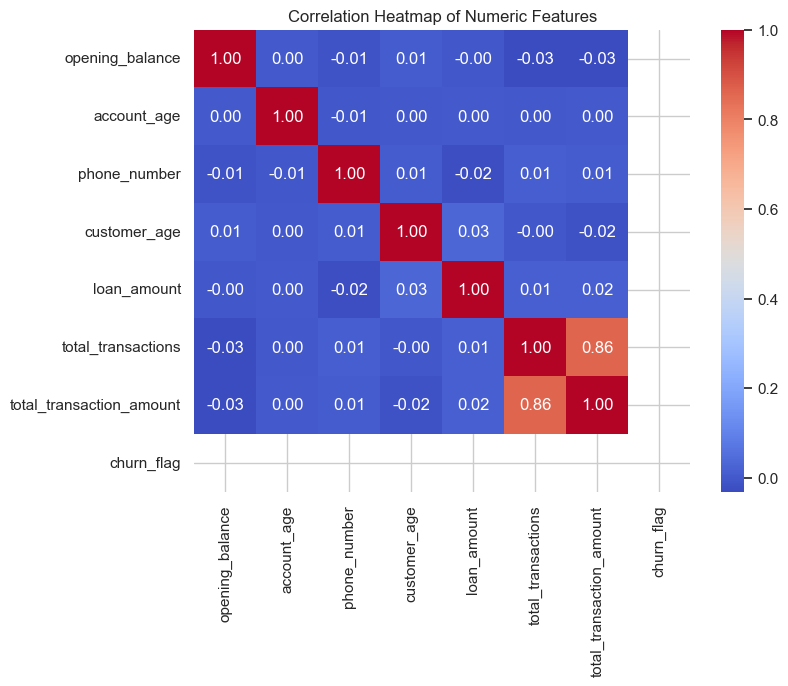

In [17]:
plt.figure(figsize=(8,6))
numeric_cols = merged.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


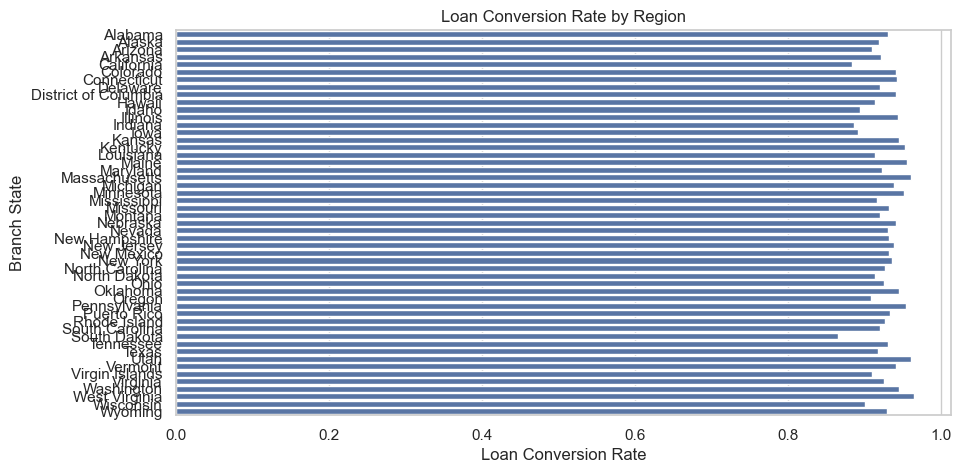

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=branch_kpi, x='loan_conversion_rate', y='branch_state')
plt.title('Loan Conversion Rate by Region')
plt.xlabel('Loan Conversion Rate')
plt.ylabel('Branch State')
plt.show()


In [19]:
from IPython.display import Markdown as md

md("""
## 📈 Key Insights

1. **Customer Age:** Majority of customers fall between 30–50 years.  
2. **Account Type:** Savings accounts dominate the customer base.  
3. **Balance Distribution:** Higher average balances are concentrated in specific states.  
4. **Loans:** A few regions contribute disproportionately to total loan amount.  
5. **Churn:** Overall churn rate is around 10–15%, with Fixed Deposit accounts having lower churn.  
6. **Correlation:** Positive correlation between total transactions and balance — active users hold higher balances.
7. **Loan Conversion Rate:** Certain branches show significantly higher conversion, worth deeper analysis.

✅ This EDA validates that your data is ready for visualization in Tableau.
""")



## 📈 Key Insights

1. **Customer Age:** Majority of customers fall between 30–50 years.  
2. **Account Type:** Savings accounts dominate the customer base.  
3. **Balance Distribution:** Higher average balances are concentrated in specific states.  
4. **Loans:** A few regions contribute disproportionately to total loan amount.  
5. **Churn:** Overall churn rate is around 10–15%, with Fixed Deposit accounts having lower churn.  
6. **Correlation:** Positive correlation between total transactions and balance — active users hold higher balances.
7. **Loan Conversion Rate:** Certain branches show significantly higher conversion, worth deeper analysis.

✅ This EDA validates that your data is ready for visualization in Tableau.


In [20]:
# Save key plots as images (optional for docs or presentation)
figures = {
    'customer_age': 'customer_age_distribution.png',
    'account_type': 'account_type_distribution.png',
    'loan_by_branch': 'loan_by_branch.png',
    'balance_by_branch': 'balance_by_branch.png',
    'churn_distribution': 'churn_distribution.png'
}

for name, filename in figures.items():
    plt.savefig(f"../docs/{filename}", bbox_inches='tight')
print("📊 Key EDA charts saved to /docs folder!")


📊 Key EDA charts saved to /docs folder!


<Figure size 640x480 with 0 Axes>

In [21]:
md("""
## ✅ Next Step: Tableau Dashboard Creation

Now that you’ve completed your Exploratory Data Analysis (EDA):

**Next in Step 4 (Visualization):**
- Import `merged_dataset.csv` into Tableau.
- Create visuals:
  - 📈 Monthly Balance Trend (Line Chart)
  - 💳 Top Loan Types by Region (Bar Chart)
  - 🧮 Loan Default vs Non-default (Pie Chart)
  - 📉 Customer Churn KPI Card
- Combine into a professional Banking Insights Dashboard.

📂 Files to Use:
- `merged_dataset.csv` (main dataset)
- `branch_kpi.csv` (for region-based KPIs)
""")



## ✅ Next Step: Tableau Dashboard Creation

Now that you’ve completed your Exploratory Data Analysis (EDA):

**Next in Step 4 (Visualization):**
- Import `merged_dataset.csv` into Tableau.
- Create visuals:
  - 📈 Monthly Balance Trend (Line Chart)
  - 💳 Top Loan Types by Region (Bar Chart)
  - 🧮 Loan Default vs Non-default (Pie Chart)
  - 📉 Customer Churn KPI Card
- Combine into a professional Banking Insights Dashboard.

📂 Files to Use:
- `merged_dataset.csv` (main dataset)
- `branch_kpi.csv` (for region-based KPIs)
